In [1]:
%load_ext autoreload
%autoreload 2


import random

import numpy as np
import matplotlib.pyplot as plt

import glob
import os

from autoscript_sdb_microscope_client.structures import AdornedImage

from liftout.fibsem import calibration, utils
from liftout import utils as l_utils 
from liftout.detection import detection

from pprint import pprint



In [2]:
# TODO:
# cosine stretch
# titlted = less pixels for same info


In [3]:
sample = "dm*"
_id = "*b0*"
img_type = "_*"
search = "landing_needle_land_sample_lowres"
filenames = glob.glob(f"data/{sample}/{_id}/*{search}{img_type}.tif") 
random.shuffle(filenames)

print(f"{len(filenames)} selected.")

9 selected.


In [4]:
sample = "dm*"
_id = "*"
img_type = "_*b"
search = "sharpen_*initial*"
filenames = glob.glob(f"data/{sample}/{_id}/*{search}{img_type}.tif") 
random.shuffle(filenames)

print(f"{len(filenames)} selected.")

6 selected.


In [20]:

paths = [r"C:\Users\pcle0002\Documents\repos\autoliftout\liftout\tools\auto\data\dm-embryo-3_20220719.104850\6a4e5fad-5484-4f20-8d9f-53d111394bb0",
r"C:\Users\pcle0002\Documents\repos\autoliftout\liftout\tools\auto\data\dm-embryo-3_20220719.104850\73d5fae8-9df6-4cc8-91e3-e2da1b94f708",
r"C:\Users\pcle0002\Documents\repos\autoliftout\liftout\tools\auto\data\dm-embryo-3_20220719.104850\552a8bea-0a8a-4f97-80fb-0fe66a5e2e6a",
]




    # for fname in filenames:
    #     img = AdornedImage.load(fname)

    #     pt, mask = detection.detect_closest_edge(img.data, (img.data.shape[0]//2, img.data.shape[1]//2))
        
    #     fig, ax = plt.subplots(1, 2, figsize=(30, 30))
    #     ax[0].set_title(os.path.basename(fname))
    #     ax[0].imshow(img.data, cmap="gray")
    #     ax[1].imshow(mask, cmap="turbo")
    #     ax[1].plot(pt.x, pt.y, "w+", ms=50, markeredgewidth=2)
    #     plt.show()



# detect_right edge...


    


### Landing Entry Alignment

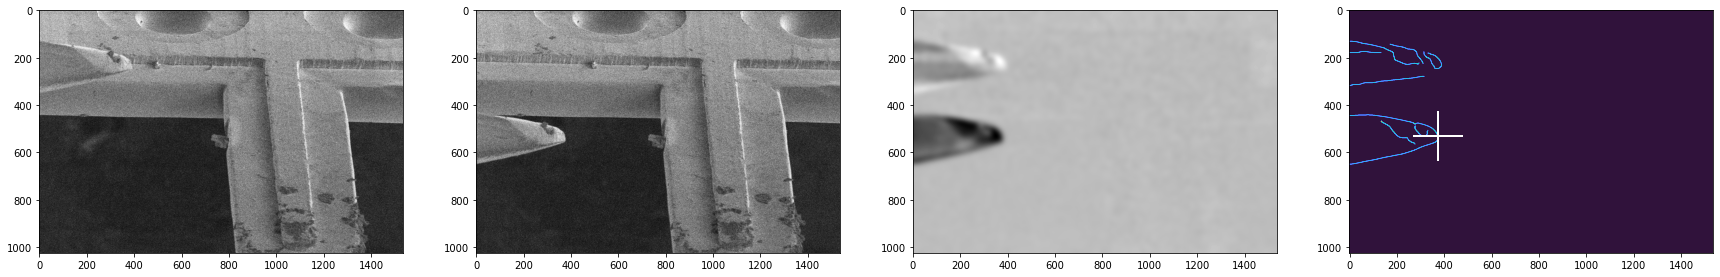

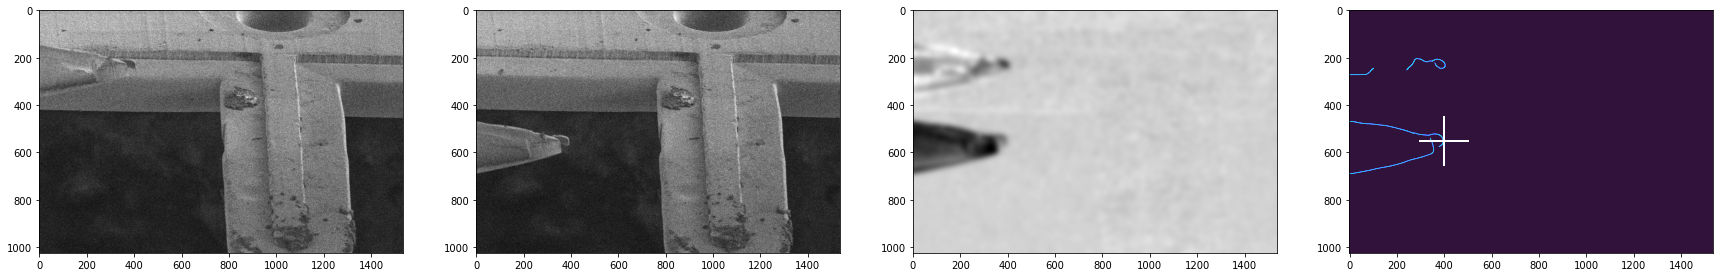

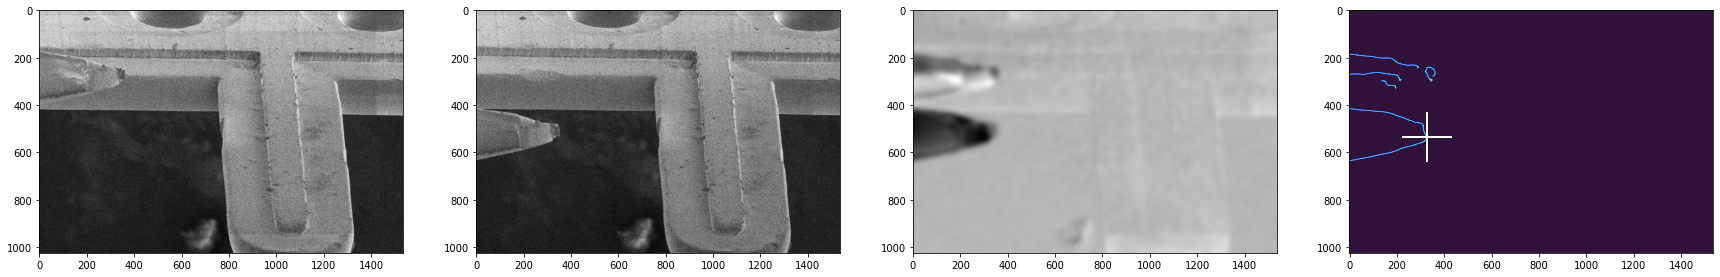

In [23]:

## TODO: BETTER LANDING ENTRY


# 1. take image before inserting
# 2. insert needle lower in eb
# 3. take difference between two images
# 4. detect needle position from difference image
# 5. detect landing post from centroid

filenames = []
for path in paths:

    fnames = [os.path.join(path, "landing_needle_land_sample_lowres_label.tif"),
    os.path.join(path, "landing_needle_land_sample_lowres_eb.tif"),
    os.path.join(path, "landing_needle_land_sample_lowres_ib.tif"),

    ]

    filenames.append(fnames)


PATH_IDX = 0

for PATH_IDX in range(3):
    img1 = AdornedImage.load(filenames[PATH_IDX][0])
    img2 = AdornedImage.load(filenames[PATH_IDX][1])

    import scipy.ndimage as ndi
    import skimage

    normalise = True
    if normalise:
        minus= calibration.normalise_image(img1) - calibration.normalise_image(img2)
    else:
        minus = img1.data - img2.data


    minus = ndi.filters.gaussian_filter(minus, sigma=12)

    pt, mask = detection.detect_closest_edge(minus, (minus.shape[0]//2, minus.shape[1]//2))

    fig, ax  = plt.subplots(1, 4, figsize=(30, 30))

    ax[0].imshow(img1.data, cmap="gray")
    ax[1].imshow(img2.data, cmap="gray")
    ax[2].imshow(minus, cmap="gray")
    ax[3].imshow(mask, cmap="turbo")
    ax[3].plot(pt.x, pt.y, "w+", ms=50, markeredgewidth=2)

    plt.show()

### Landing Post Touchdown

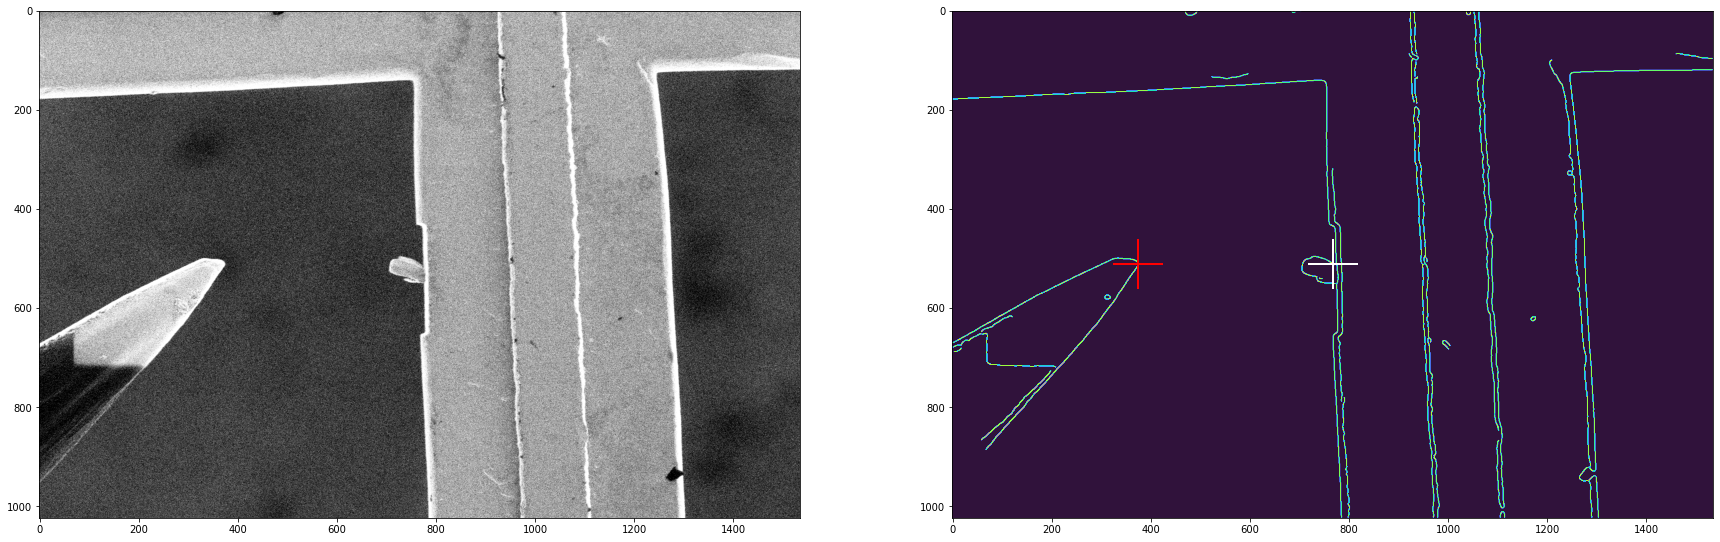

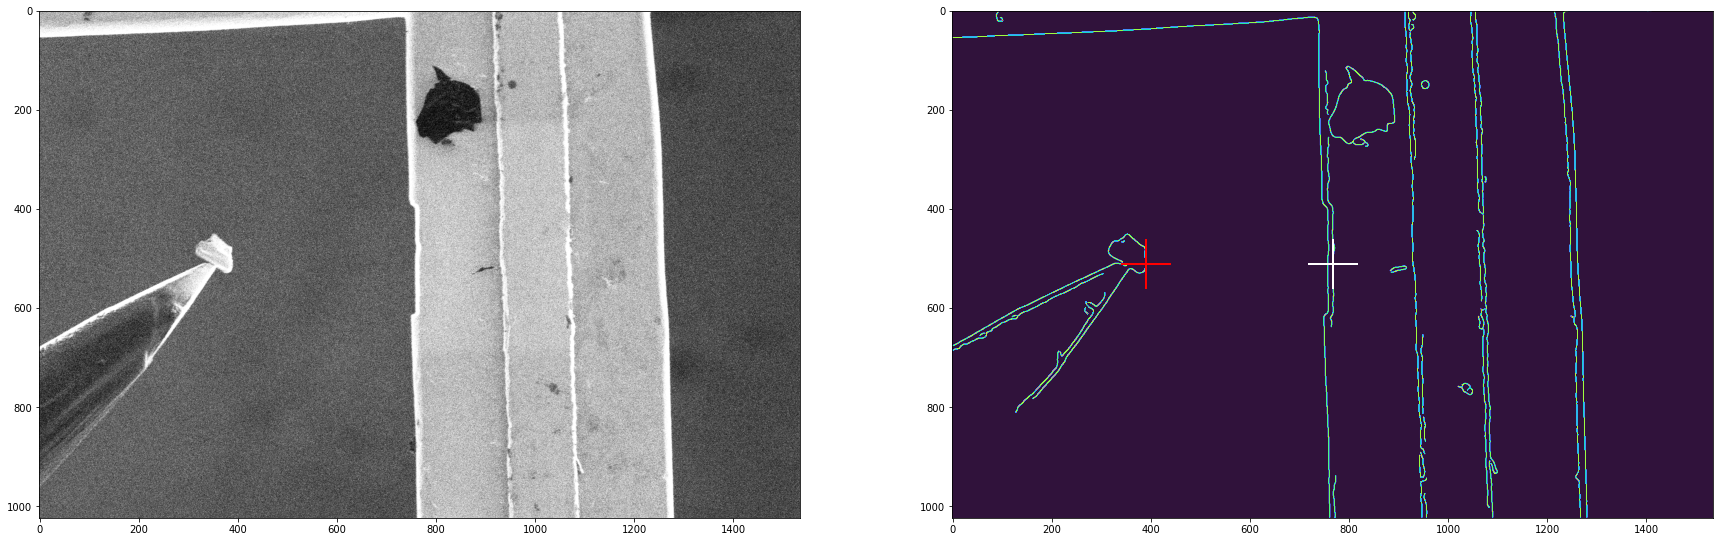

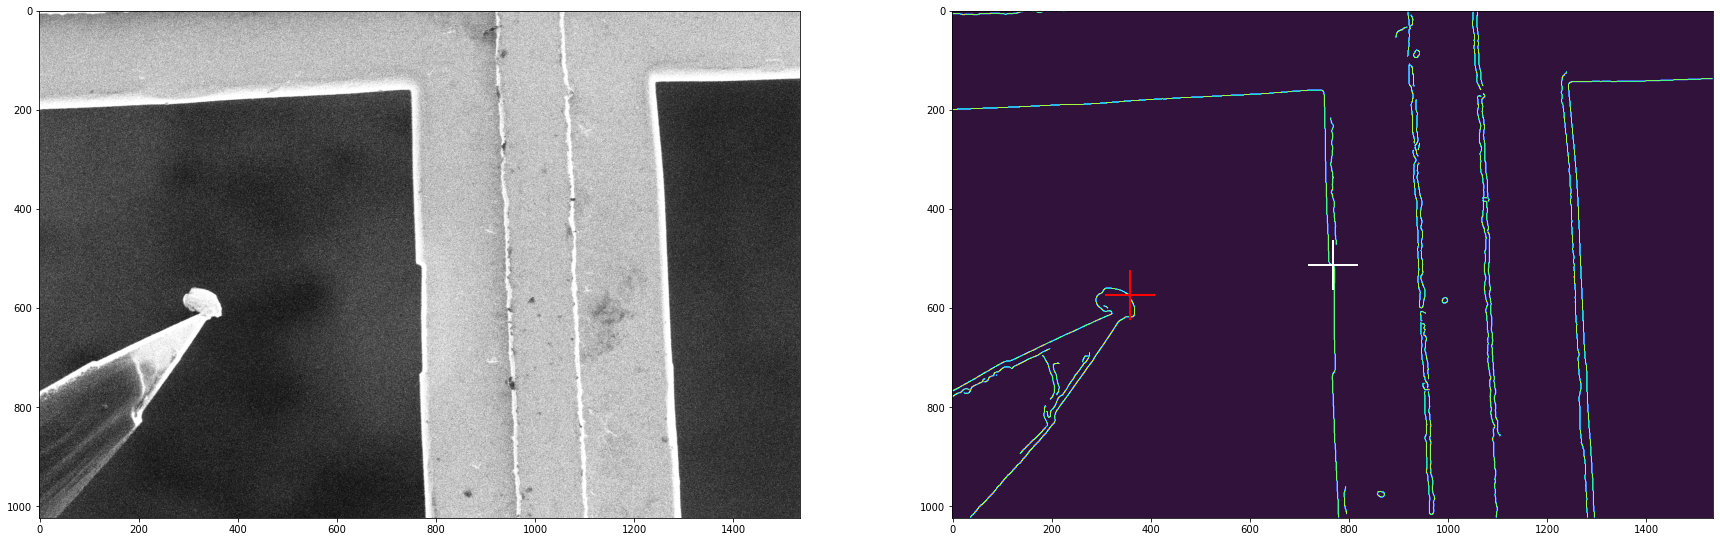

In [36]:
filenames = []
for path in paths:

    fnames = [os.path.join(path, "landing_needle_land_sample_lowres_label.tif"),
    os.path.join(path, "landing_needle_land_sample_lowres_eb.tif"),
    os.path.join(path, "landing_needle_land_sample_lowres_ib.tif"),
    os.path.join(path, "landing_needle_land_sample_lowres_after_y_move_ib.tif"),
    

    ]

    filenames.append(fnames)


PATH_IDX = 0

for PATH_IDX in range(3):
    # img1 = AdornedImage.load(filenames[PATH_IDX][2])
    img1 = AdornedImage.load(filenames[PATH_IDX][3])


    # TODO: mask the images to help out

    post, mask = detection.detect_closest_edge(img1.data, (img1.data.shape[0]//2, img1.data.shape[1]//2))
    # needle, _ = detection.detect_closest_edge(img1.data, (int(img1.data.shape[0] *0.75), int(img1.data.shape[1] * 0.3))) # step 1
    needle, _ = detection.detect_closest_edge(img1.data, (int(img1.data.shape[0] * 0.5), int(img1.data.shape[1] * 0.3)))   # step 2

    fig, ax  = plt.subplots(1, 2, figsize=(30, 30))

    ax[0].imshow(img1.data, cmap="gray")
    ax[1].imshow(mask, cmap="turbo")
    ax[1].plot(post.x, post.y, "w+", ms=50, markeredgewidth=2)
    ax[1].plot(needle.x, needle.y, "r+", ms=50, markeredgewidth=2)

    # ax[2].imshow(img2.data, cmap="gray")
    # ax[3].imshow(minus, cmap="gray")

    plt.show()

In [7]:
# find needle


# mask


# take image
# insert
# subtract (find background)





In [24]:

## Steps


# trench -> jcut align ib (rotate) to eb


# jcut -> tilt. align ib to ib
# dont have any images pre-tilting


# jcut -> tilt back flat align (ib to ib)

# needle insert - land on lamella xy


# needle land on lamella xz 


# land align needle xy

# land needle xz ion

